In [1]:
import math
from statistics import mean 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import numpy as np

In [2]:
u1 = np.random.uniform(size=1000000)
u2 = np.random.uniform(size=1000000)
R_sq = -2 * np.log(u1)
theta = 2 * np.pi * u2
Variance = 1
mean = 0
z1 = ((np.sqrt(R_sq) * np.cos(theta))*Variance)+mean

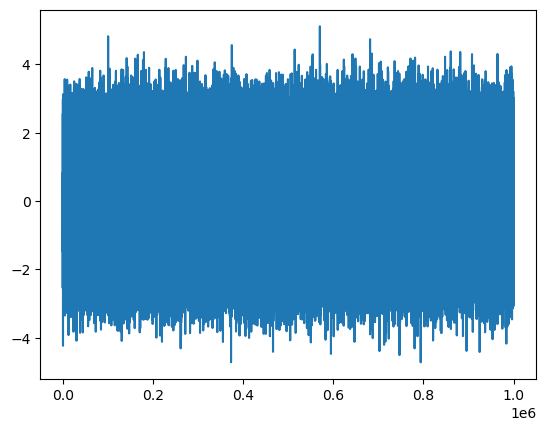

In [3]:
plt.plot(z1)

Text(0, 0.5, 'Frequency')

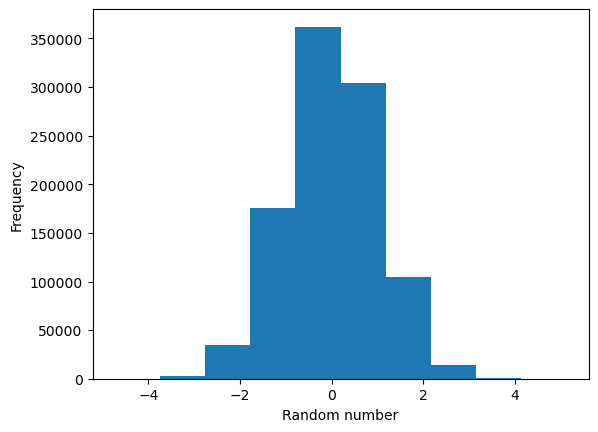

In [4]:
plt.hist(z1)
plt.xlabel("Random number")
plt.ylabel("Frequency")

In [5]:
STANDARD = np.std(z1)
MEAN = np.mean(z1)
print(STANDARD)
print(MEAN)

0.9996157605302051
0.000649001577885232


In [6]:
def random(Sigma):
        u1 = np.random.uniform(size=1)
        u2 = np.random.uniform(size=1)
        R_sq = -2 * np.log(u1)
        theta = 2 * np.pi * u2
        X_i = (np.sqrt(R_sq) * np.cos(theta))*Sigma
        return X_i

In [7]:
def GARCH(a_0,a_1,b_1, no_reps):
    Sigma = 1
    X = []
    for i in range(no_reps):
        X_i = random(Sigma)
        Sigma_squared = a_0 + (a_1*X_i*X_i) + b_1*Sigma*Sigma
        Sigma = np.sqrt(Sigma_squared)
        X.append(X_i)
    return(X)

-0.0413156837637241
13.729669464302564


Text(0.5, 1.0, "('GARCH(1,1) process, a_0=', 1, ', a_1=', 0.5, ', and b_1=', 0.45)")

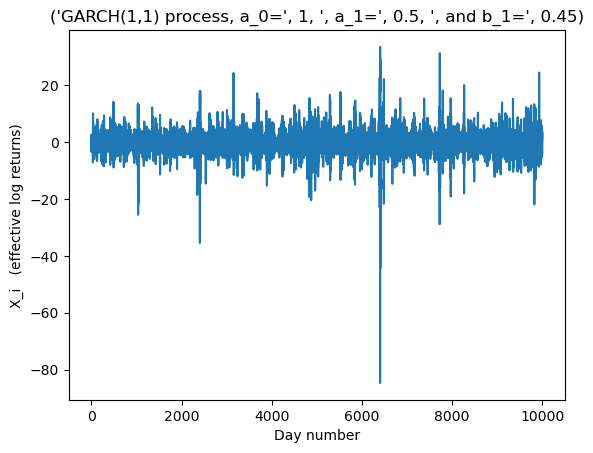

In [8]:
a_0 = 1
a_1 = 0.50
b_1=0.45
reps = 10000
X = GARCH(a_0,a_1,b_1,reps)
print(np.mean(X))
print(np.std(X)*np.std(X))
plt.plot(X)
title="GARCH(1,1) process, a_0=",a_0,", a_1=",a_1,", and b_1=",b_1
plt.ylabel("X_i   (effective log returns)")
plt.xlabel("Day number")
plt.title(title)



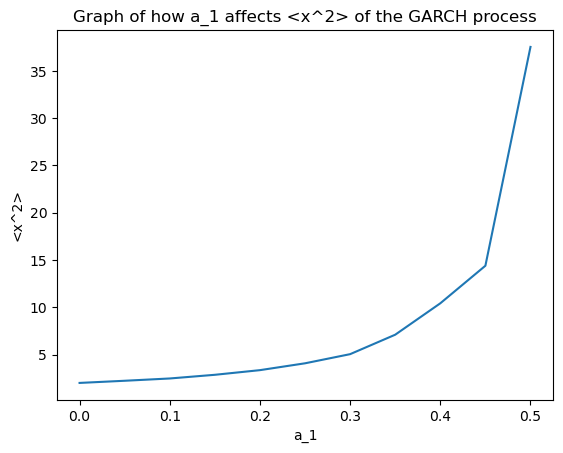

In [9]:
def a_1_changer():
    start = 0
    final = 0.5
    no_runs = 10
    a_0 = 1
    b_1 = 0.5
    diff = (final-start)/no_runs
    A_1_list = []
    MEAN_list = []
    for i in range(no_runs+1):
        a_1 = start+(i*diff)
        X = GARCH(a_0,a_1,b_1,100000)
        X=np.array(X)
        X=X*X
        MEAN = np.mean(X)
        MEAN_list.append(MEAN)
        A_1_list.append(a_1)
        #print(i)
    plt.xlabel("a_1")
    plt.ylabel("<x^2>")
    plt.title("Graph of how a_1 affects <x^2> of the GARCH process")
    plt.plot(A_1_list,MEAN_list)

a_1_changer()
#a_1_changer()
#a_1_changer()
#a_1_changer()
#a_1_changer()
#a_1_changer()
#a_1_changer()

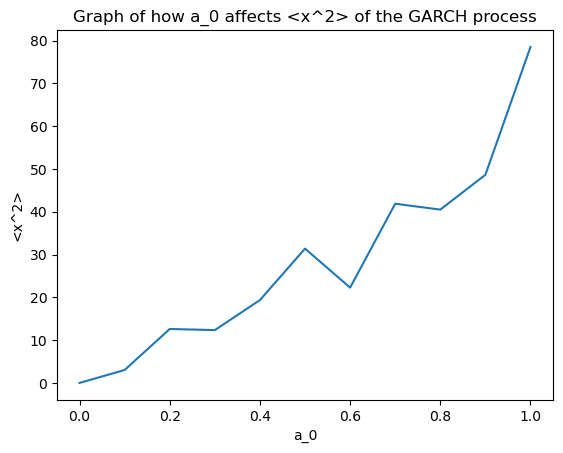

In [10]:
def a_0_changer():
    start = 0
    final = 1
    no_runs = 10
    a_1 = 0.5
    b_1 = 0.5
    diff = (final-start)/no_runs
    A_0_list = []
    MEAN_list = []
    for i in range(no_runs+1):
        a_0 = start+(i*diff)
        X = GARCH(a_0,a_1,b_1,100000)
        X=np.array(X)
        X=X*X
        MEAN = np.mean(X)
        MEAN_list.append(MEAN)
        A_0_list.append(a_0)
        #print(i)
    plt.xlabel("a_0")
    plt.ylabel("<x^2>")
    plt.title("Graph of how a_0 affects <x^2> of the GARCH process")
    plt.plot(A_0_list,MEAN_list)

a_0_changer()

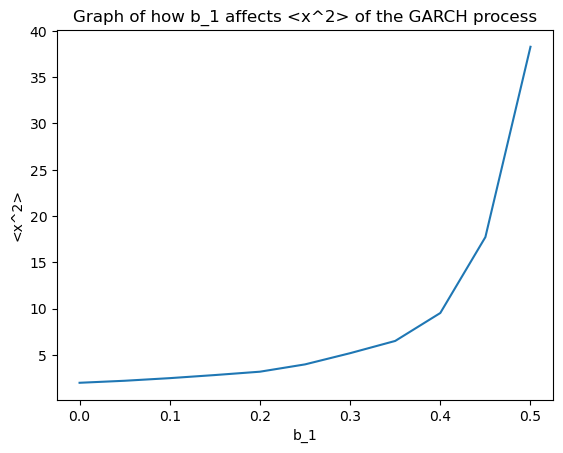

In [11]:
def b_1_changer():
    start = 0
    final = 0.5
    no_runs = 10
    a_0 = 1
    a_1 = 0.5
    diff = (final-start)/no_runs
    B_1_list = []
    MEAN_list = []
    for i in range(no_runs+1):
        b_1 = start+(i*diff)
        X = GARCH(a_0,a_1,b_1,100000)
        X=np.array(X)
        X=X*X
        MEAN = np.mean(X)
        MEAN_list.append(MEAN)
        B_1_list.append(b_1)
        #print(i)
    plt.xlabel("b_1")
    plt.ylabel("<x^2>")
    plt.title("Graph of how b_1 affects <x^2> of the GARCH process")
    plt.plot(B_1_list,MEAN_list)

b_1_changer()

In [12]:
a0 = 1
a1 = 0.05
b1 = 0.5
Sliding_window = 50

def OUTLYER_GARCH(a0, a1, b1, Sliding_window):
    X = GARCH(a0,a1,b1,10000)
    Anom = []
    no_SD = 3
    for i in range(len(X)-Sliding_window):
        Window = []
        for j in range(Sliding_window):
            Window.append(X[i+j])
        STANDARD = np.std(Window)
        MEAN = np.mean(Window)
        #plt.scatter(i+Sliding_window,MEAN+(no_SD*STANDARD),marker = 's',color='green')
        #plt.scatter(i+Sliding_window,MEAN-(no_SD*STANDARD),marker = 's',color='green')
        if X[i+Sliding_window] > MEAN+(no_SD*STANDARD):
            Anom.append(i+Sliding_window)
            plt.scatter(i+Sliding_window,X[i+Sliding_window],marker = 'x',color='red')
        if X[i+Sliding_window] < MEAN-(no_SD*STANDARD):
            Anom.append(i+Sliding_window)
            plt.scatter(i+Sliding_window,X[i+Sliding_window],marker = 'x',color='red')
        if X[i+Sliding_window] == 0:
            Anom.append(i+Sliding_window)
            plt.scatter(i+Sliding_window,X[i+Sliding_window],marker = 'x',color='red')
    plt.ylabel("Log return")
    plt.xlabel("date number")
    plt.title("GARCH outlyers using a0="+ str(a0) +", a1="+ str(a1) +" and b1="+ str(b1))
    plt.plot(X)
    plt.show()
    return(Anom)

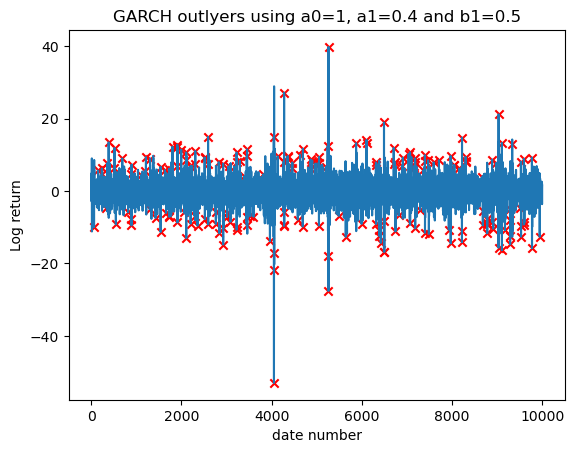

In [13]:
Anom = OUTLYER_GARCH(1, 0.4, 0.5, 50)

In [14]:
print(100*len(Anom)/10000)
print(len(Anom))

1.9
190


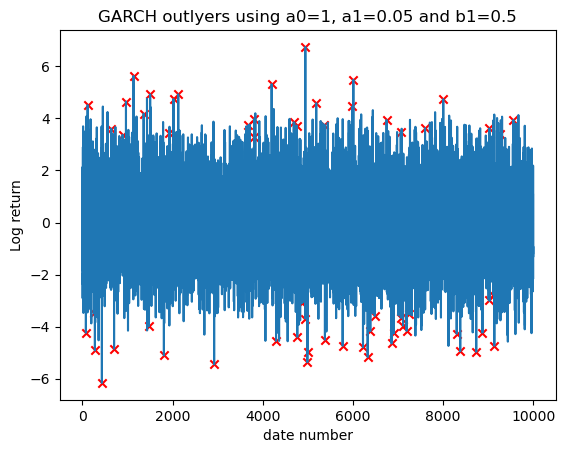

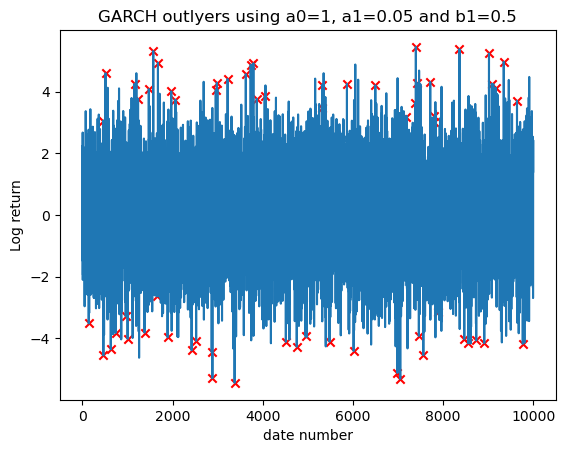

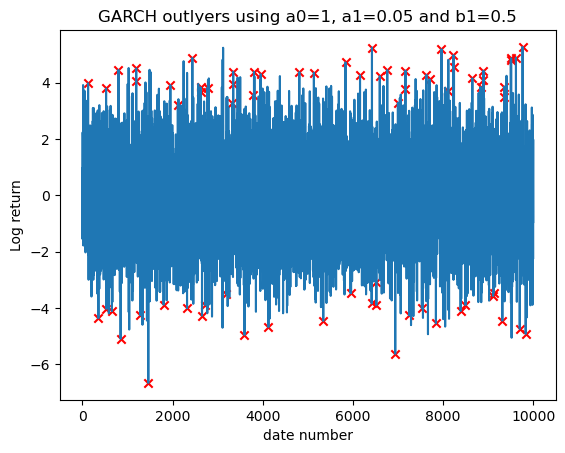

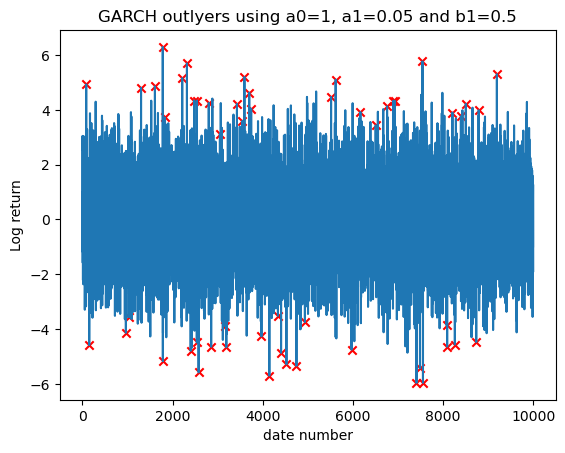

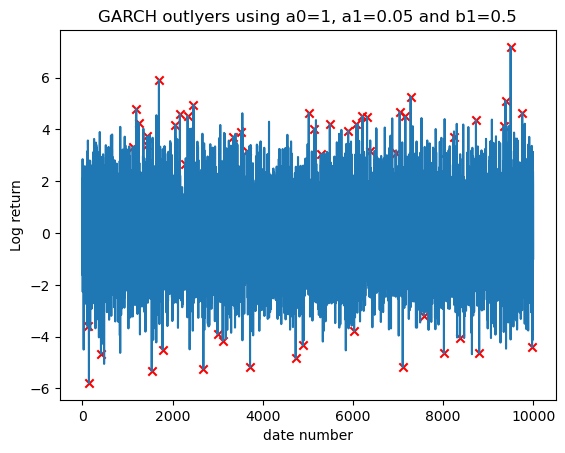

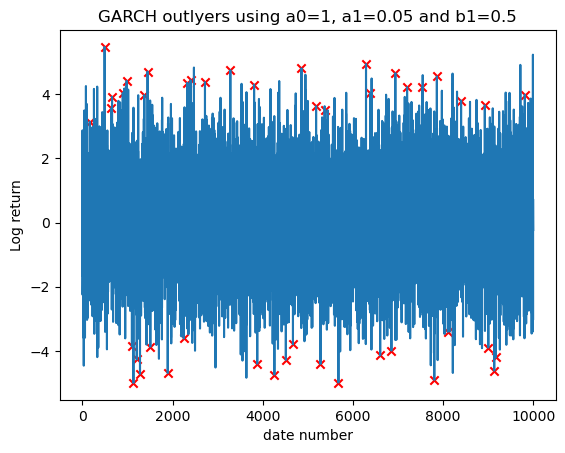

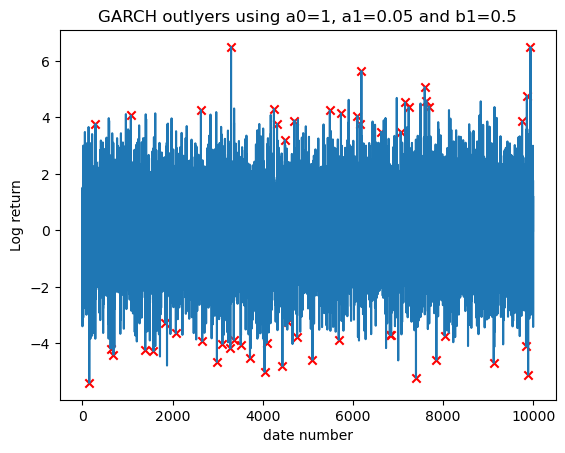

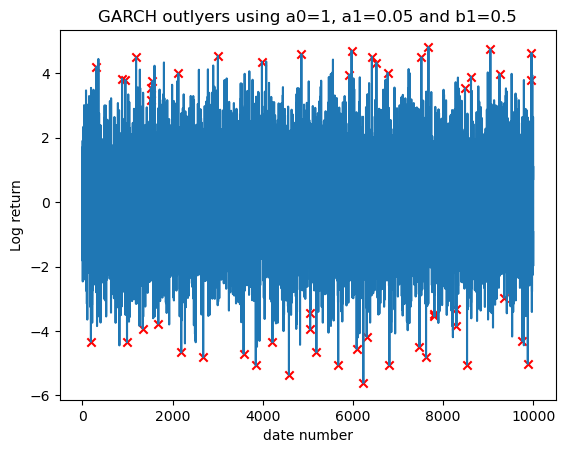

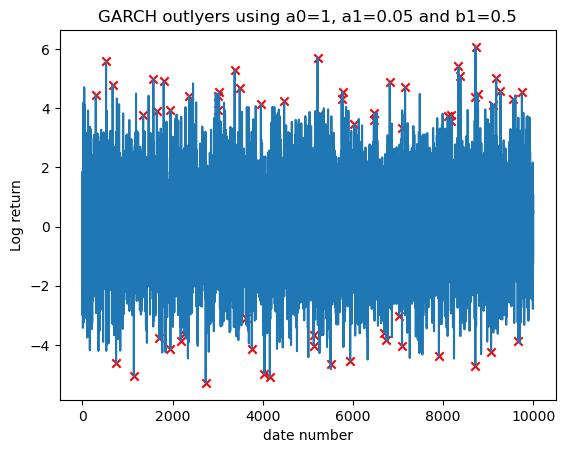

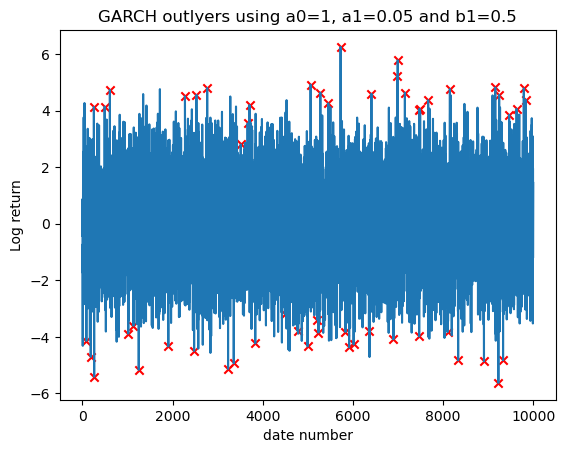

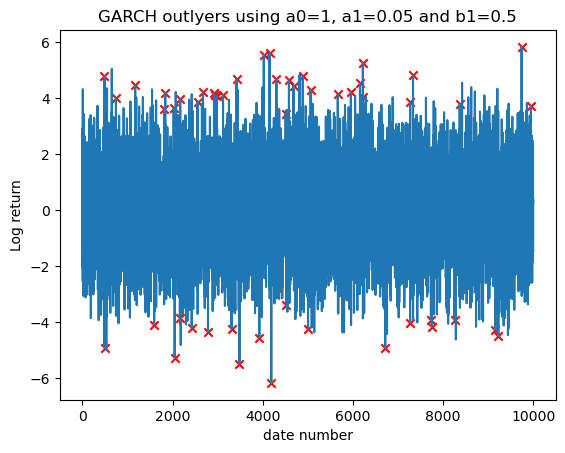

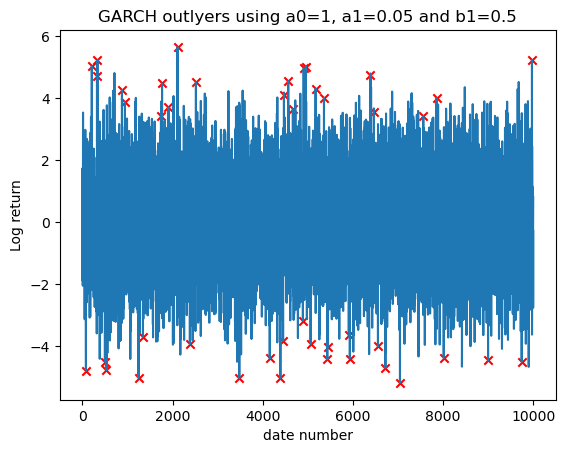

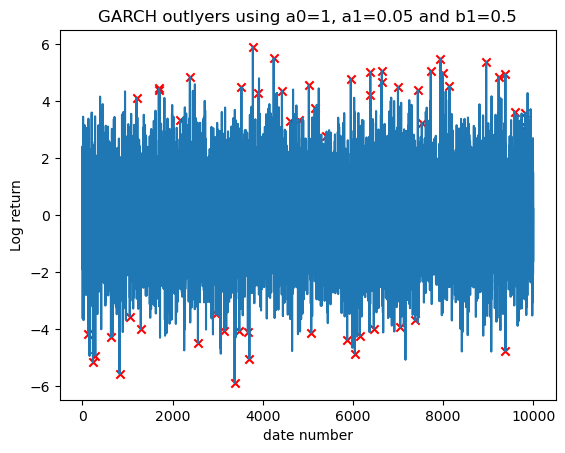

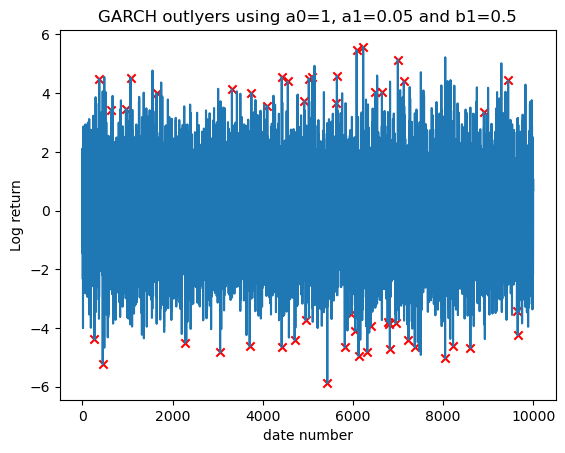

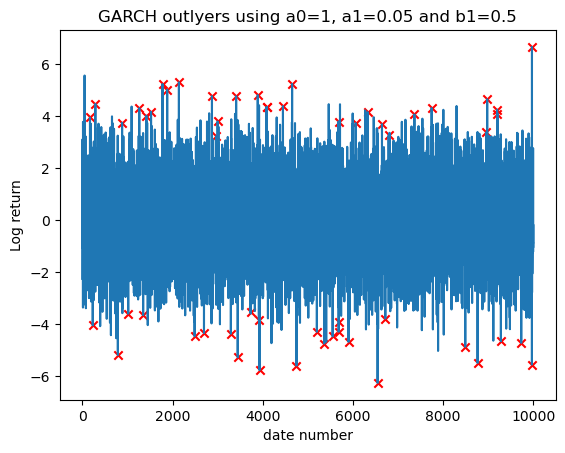

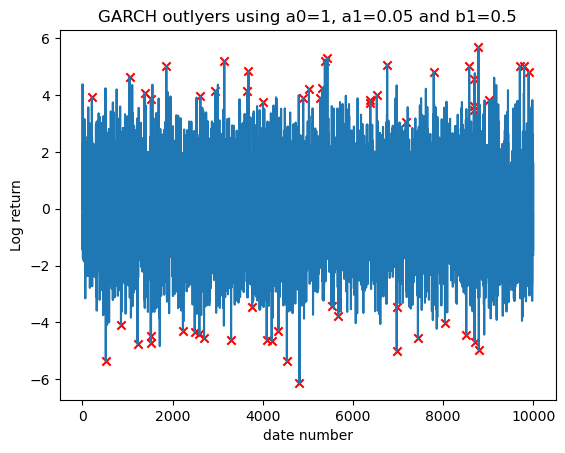

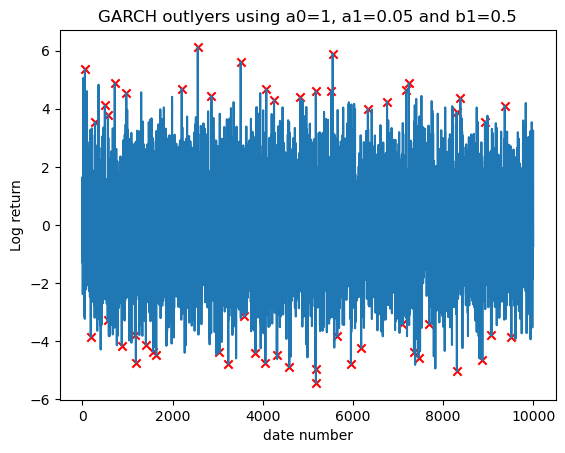

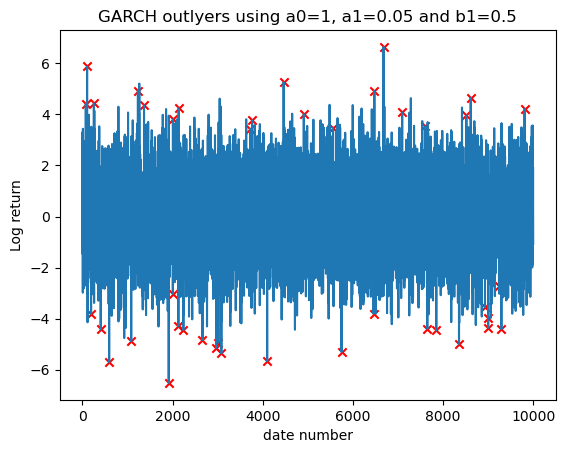

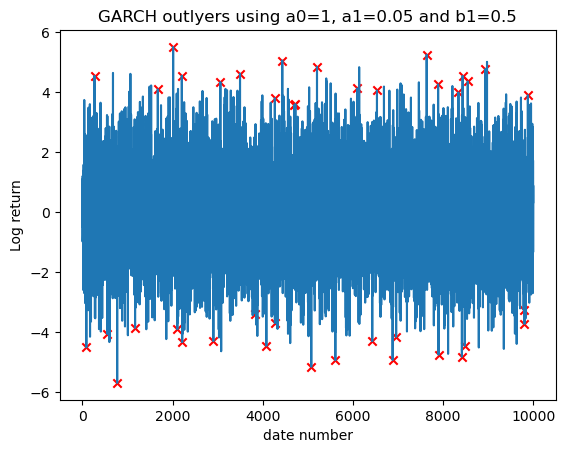

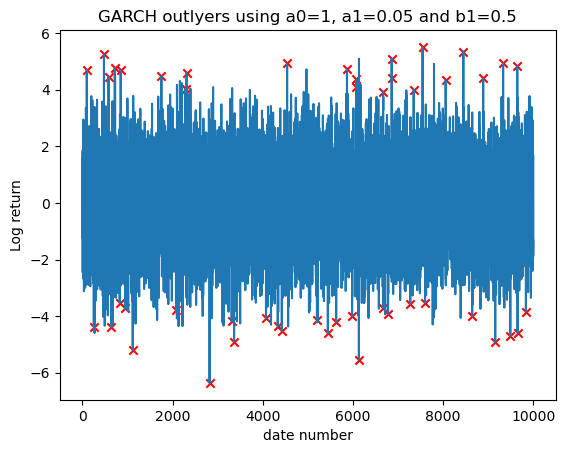

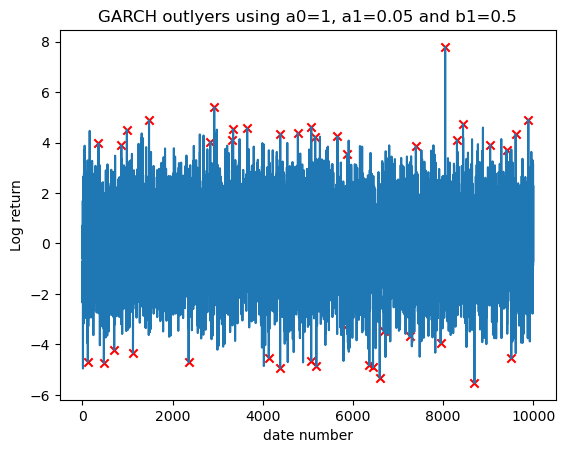

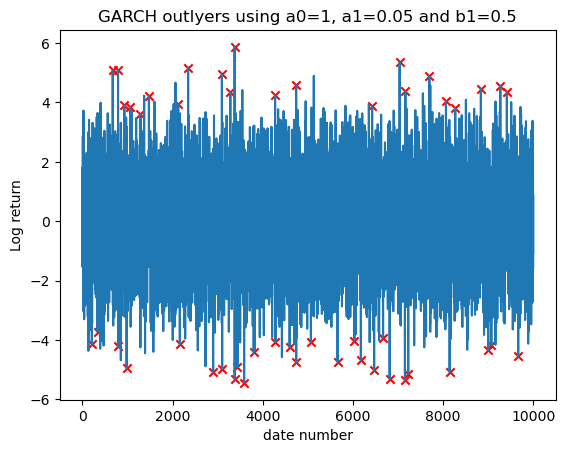

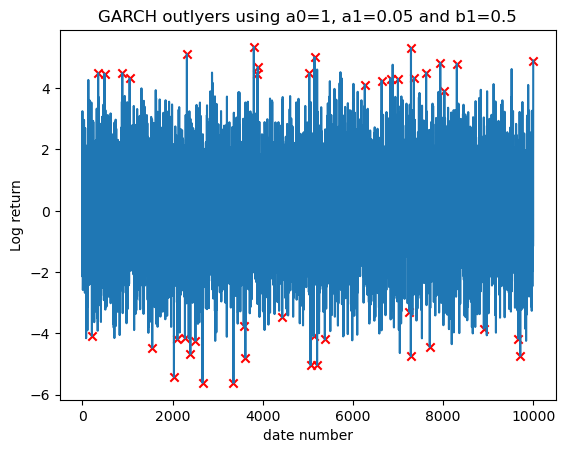

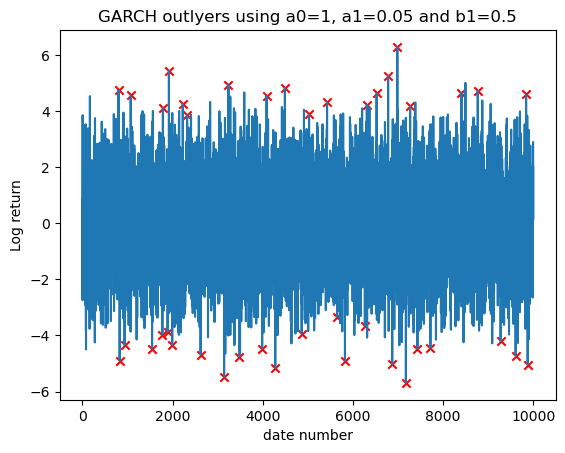

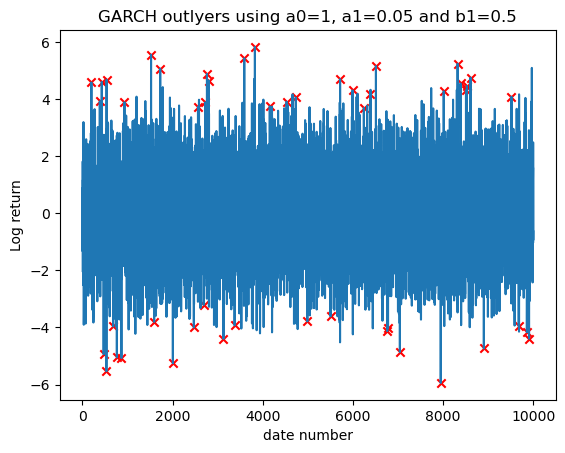

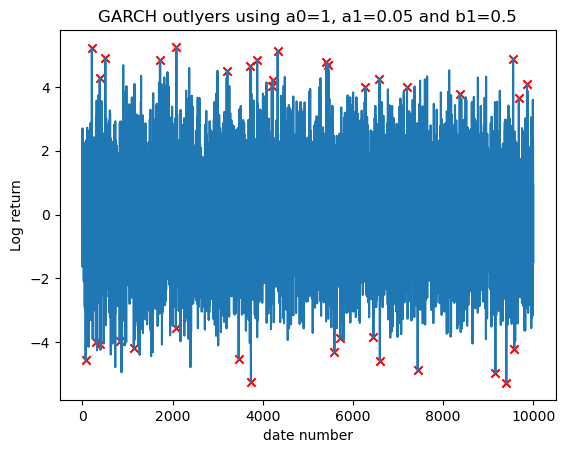

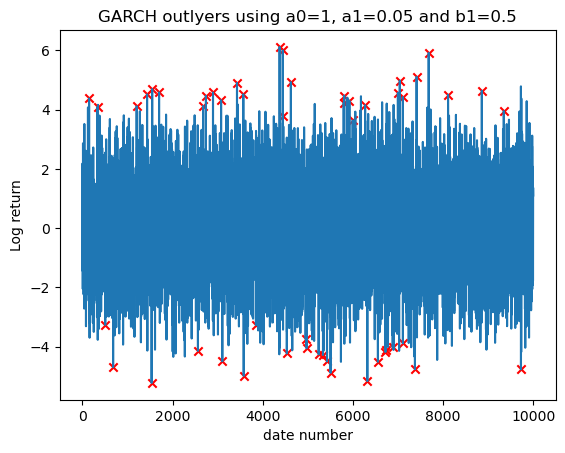

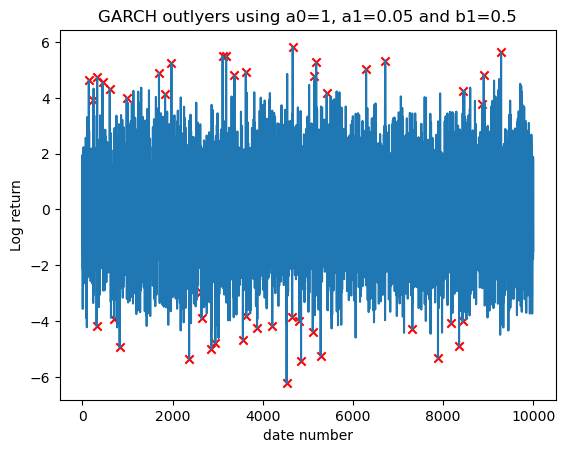

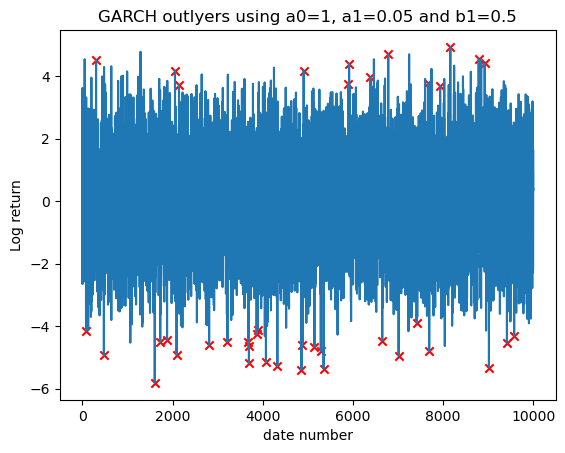

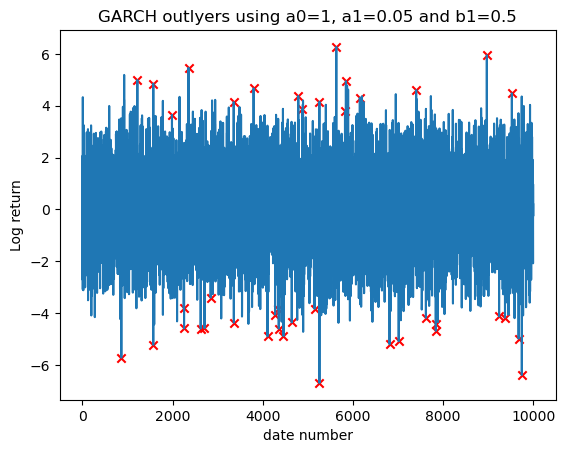

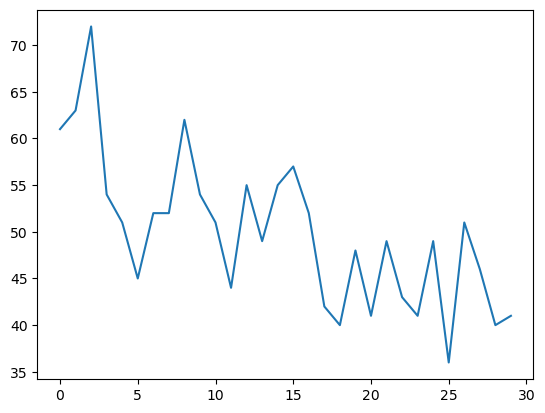

In [15]:
Anom_len = []
for i in range(30):
    Anom = OUTLYER_GARCH(a0, a1, b1, i+40)
    Anom_len.append(len(Anom))
plt.show()
plt.plot(Anom_len)